In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Resolution: 10x10


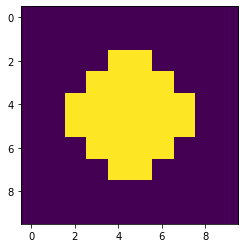



Quadrupol moment:

 [[0. 0.]
 [0. 0.]]


Octupolpol moment:

 [[[-2.96059473e-15 -1.73934941e-15]
  [-1.73934941e-15 -2.10942375e-15]]

 [[-1.73934941e-15 -2.10942375e-15]
  [-2.11867561e-15 -2.96059473e-15]]]


Hexadecapol moment:

 [[[[ 4.04854443e+00 -2.96059473e-16]
   [-2.96059473e-16 -4.04854443e+00]]

  [[-5.92118946e-16 -4.04854443e+00]
   [-4.04854443e+00 -5.92118946e-16]]]


 [[[-5.92118946e-16 -4.04854443e+00]
   [-4.04854443e+00 -2.96059473e-16]]

  [[-4.04854443e+00 -2.96059473e-16]
   [ 0.00000000e+00  4.04854443e+00]]]]



Resolution: 100x100


/tmp/ipykernel_25568/2528623063.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  dis_data = np.array([res, quad_val, hexa_val, round(hexa_val/quad_val, 4)])


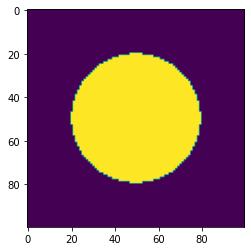



Quadrupol moment:

 [[-4.12506668e-17 -3.98810158e-18]
 [-3.98810158e-18  4.12506668e-17]]


Octupolpol moment:

 [[[1.32002134e-15 4.77283106e-16]
  [4.51501439e-16 6.60010669e-16]]

 [[4.51501439e-16 6.60010669e-16]
  [9.90016003e-16 1.21845315e-15]]]


Hexadecapol moment:

 [[[[ 1.09230973e-01  3.86725001e-18]
   [ 2.96489168e-17 -1.09230973e-01]]

  [[-2.57816668e-18 -1.09230973e-01]
   [-1.09230973e-01  3.60943335e-17]]]


 [[[ 5.15633335e-18 -1.09230973e-01]
   [-1.09230973e-01  1.03126667e-17]]

  [[-1.09230973e-01  1.54690001e-17]
   [ 1.54690001e-17  1.09230973e-01]]]]



Resolution: 1000x1000


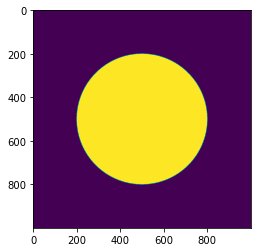



Quadrupol moment:

 [[ 3.78687553e-17  3.14753342e-18]
 [ 3.14753342e-18 -3.78687553e-17]]


Octupolpol moment:

 [[[ 7.95405005e-15 -7.46571873e-17]
  [-7.46320086e-17 -2.35722930e-16]]

 [[-7.46320086e-17 -2.35722930e-16]
  [-2.35722930e-16  2.65507604e-16]]]


Hexadecapol moment:

 [[[[ 4.33457410e-03 -2.17292126e-17]
   [-1.41630152e-18 -4.33457410e-03]]

  [[-5.60225934e-19 -4.33457410e-03]
   [-4.33457410e-03  1.22368451e-17]]]


 [[[-1.57366836e-18 -4.33457410e-03]
   [-4.33457410e-03  1.15821991e-18]]

  [[-4.33457410e-03 -1.25893468e-18]
   [ 2.56822676e-18  4.33457410e-03]]]]



Resolution: 10000x10000


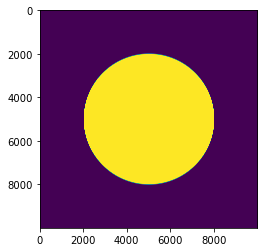



Quadrupol moment:

 [[ 7.89118474e-16  2.82473914e-19]
 [ 2.82473914e-19 -7.89118474e-16]]


Octupolpol moment:

 [[[ 6.82455016e-15 -1.20267719e-16]
  [-1.25699714e-16  7.47553082e-17]]

 [[-1.25699714e-16  7.47553082e-17]
  [ 7.47548064e-17 -4.94436996e-16]]]


Hexadecapol moment:

 [[[[ 6.62016446e-05 -6.19309251e-18]
   [ 1.20875774e-18 -6.62016446e-05]]

  [[ 4.29185659e-18 -6.62016446e-05]
   [-6.62016446e-05 -2.41462491e-18]]]


 [[[ 1.92121850e-18 -6.62016446e-05]
   [-6.62016446e-05  1.44616087e-18]]

  [[-6.62016446e-05  3.44090019e-18]
   [ 1.92875910e-18  6.62016446e-05]]]]



            0                        1                      2  \
0  Resolution               Quad Value             Hexa Value   
1        10.0                      0.0      4.048544429202873   
2       100.0  -4.1250666807552986e-17    0.10923097307192209   
3      1000.0    3.786875530060917e-17   0.004334574103317689   
4     10000.0    7.891184735622431e-16  6.620164456789455e-05   

           

In [13]:
#UPWARDS ELLIPSES


ratio_data_ell = np.array([["Resolution", "Quad Value", "Hexa Value", "Hexa:Quad Ratio"]])

for res in [10, 100, 1000, 10000]:
    
    print("Resolution: {}x{}".format(res,res))
    nx=res
    ny=res
    x=np.outer(np.linspace(-5,5,nx),np.ones(ny))
    y=np.outer(np.ones(nx),np.linspace(-5,5,ny))
    img=np.zeros((res, res))


    re=np.sqrt(x**2 + y**2)


    img[re<3.0]=1



    plt.imshow(img)
    plt.show()





    # Quadruple moment:
    rsqr=x**2 + y**2
    q2=np.zeros([2,2])
    xy=[x,y]
    for i in [0,1]:
        for j in [0,1]:
            if i==j:
                dij=1
            else:
                dij=0
            q2[i,j]=1./2.*np.sum(img*(2*xy[i]*xy[j] - rsqr*dij))
    print("\n\nQuadrupol moment:\n\n",q2/np.sum(img))
    q2_norm = q2/np.sum(img)


    # Octupole moment:

    q3=np.zeros([2,2,2])
    xy=[x,y]
    for i in [0,1]:
        for j in [0,1]:
            if i==j:
                dij=1
            else:
                dij=0
            for k in [0,1]:
                if i==k:
                    dik=1
                else:
                    dik=0
                if j==k:
                    djk=1
                else:
                    djk=0
                q3[i,j,k]=1./2.*np.sum(img*(4*xy[i]*xy[j]*xy[k])) - np.sum(img*(rsqr*(xy[i]*djk + xy[j]*dik + xy[k]*dij)))
    print("\n\nOctupolpol moment:\n\n",q3/np.sum(img))

    # Hexadecapole moment:

    q4=np.zeros([2,2,2,2])
    xy=[x,y]
    for i in [0,1]:
        for j in [0,1]:
            if i==j:
                dij=1
            else:
                dij=0
            for k in [0,1]:
                if i==k:
                    dik=1
                else:
                    dik=0
                if j==k:
                    djk=1
                else:
                    djk=0
                for l in [0,1]:
                    if i==l:
                        dil=1
                    else:
                        dil=0
                    if j==l:
                        djl=1
                    else:
                        djl=0
                    if k==l:
                        dkl=1
                    else:
                        dkl=0
                    q4[i,j,k,l]=1./8.*np.sum(img*(24*xy[i]*xy[j]*xy[k]*xy[l] - 
                                           4*rsqr*(xy[k]*xy[l]*dij + xy[j]*xy[l]*dik + xy[j]*xy[k]*dil + xy[i]*xy[l]*djk + xy[i]*xy[k]*djl + xy[i]*xy[j]*dkl)) +
                                           img*(dij*dkl + dik*djl + dil*djk)*rsqr**2)

    print("\n\nHexadecapol moment:\n\n",q4/np.sum(img))
    q4_norm =q4/np.sum(img)

    quad_val = q2_norm[0,0]
    hexa_val = q4_norm[0,0,0,0]


    dis_data = np.array([res, quad_val, hexa_val, round(hexa_val/quad_val, 4)])
    ratio_data_ell = np.vstack([ratio_data_ell, dis_data])


    print("\n\n")

    
data_table = pd.DataFrame(ratio_data_ell)
        
print(data_table)
